# Customer Analytics Project

## Background:
Simulated data downloaded from the LinkedIn course called "Predictive Customer Analytics". Includes three different datasets showing specific customer behaviors.


### *Primary Question*

*Can we predict customer behavior?*


## Outline:
* Part 1 - Identify Customer Propensity
* Part 2 - Predict Customer Lifetime Value (CLV)
* Part 3 - Group Customer Issues

***

# PART 1: CUSTOMER PROPENSITY

## Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
sns.set()

In [2]:
# Data showing customer behavior and the way they use the website before purchasing
browsing = pd.read_csv('data/browsing_data.csv')

## Explore the Data

In [3]:
# No missing data and all integers wih the target variable "BUY"
# A small sample size
browsing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
SESSION_ID         500 non-null int64
IMAGES             500 non-null int64
REVIEWS            500 non-null int64
FAQ                500 non-null int64
SPECS              500 non-null int64
SHIPPING           500 non-null int64
BOUGHT_TOGETHER    500 non-null int64
COMPARE_SIMILAR    500 non-null int64
VIEW_SIMILAR       500 non-null int64
WARRANTY           500 non-null int64
SPONSORED_LINKS    500 non-null int64
BUY                500 non-null int64
dtypes: int64(12)
memory usage: 47.0 KB


In [4]:
# Already we know customers buy a little over a third of the time
browsing.describe()

,SESSION_ID,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,BUY
count,500.000000,500.000000,500.0000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1250.500000,0.510000,0.5200,0.440000,0.4800,0.528000,0.500000,0.580000,0.468000,0.532000,0.550000,0.370000
std,144.481833,0.500401,0.5001,0.496884,0.5001,0.499715,0.500501,0.494053,0.499475,0.499475,0.497992,0.483288
min,1001.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1125.750000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1250.500000,1.000000,1.0000,0.000000,0.0000,1.000000,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1375.250000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1500.000000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Session_id is each session on the website, all binary results
# Not much to do with EDA and distributions
browsing.head()

,SESSION_ID,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,BUY
0,1001,0,0,1,0,1,0,0,0,1,0,0
1,1002,0,1,1,0,0,0,0,0,0,1,0
2,1003,1,0,1,1,1,0,0,0,1,0,0
3,1004,1,0,0,0,1,1,1,0,0,0,0
4,1005,1,1,1,0,1,0,1,0,0,0,0


In [6]:
# I will look at the correlation matrix of these variables with the target variable
browsing.corr()['BUY']

SESSION_ID         0.026677
IMAGES             0.046819
REVIEWS            0.404628
FAQ               -0.095136
SPECS              0.009950
SHIPPING          -0.022239
BOUGHT_TOGETHER   -0.103562
COMPARE_SIMILAR    0.190522
VIEW_SIMILAR      -0.096137
WARRANTY           0.179156
SPONSORED_LINKS    0.110328
BUY                1.000000
Name: BUY, dtype: float64

In [7]:
# Will now keep the features with higher correlation to BUY
browse_feat = browsing[['REVIEWS','BOUGHT_TOGETHER','COMPARE_SIMILAR','WARRANTY','SPONSORED_LINKS']]
target = browsing.BUY

## Build and Train the Model

In [8]:
# Import libraries
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics

In [9]:
# Split Train and Test
X_train, X_test, y_train, y_test = train_test_split(browse_feat, target, test_size=0.30, random_state=123)

### Gaussian Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

# Train and predict the model
model=GaussianNB()
model=model.fit(X_train,y_train)
g_predict = model.predict(X_test)

# Print results
print(confusion_matrix(y_test,g_predict))
print(classification_report(y_test,g_predict))

[[80 20]
 [20 30]]
             precision    recall  f1-score   support

          0       0.80      0.80      0.80       100
          1       0.60      0.60      0.60        50

avg / total       0.73      0.73      0.73       150



*Not a high accuracy score on this one but could be to the small dataset. Possibility to predict if a customer will buy a product based on their browsing on the website.*

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

# Train and predict the model
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
l_predict = log_model.predict(X_test)

# Print results
print(confusion_matrix(y_test,l_predict))
print(classification_report(y_test,l_predict))

[[83 17]
 [24 26]]
             precision    recall  f1-score   support

          0       0.78      0.83      0.80       100
          1       0.60      0.52      0.56        50

avg / total       0.72      0.73      0.72       150



### Random Forests

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train and predict the model
rforest = RandomForestClassifier(n_estimators=500)
rforest.fit(X_train,y_train)
rpredict = rforest.predict(X_test)

# Print results
print(confusion_matrix(y_test,rpredict))
print(classification_report(y_test,rpredict))

[[75 25]
 [ 7 43]]
             precision    recall  f1-score   support

          0       0.91      0.75      0.82       100
          1       0.63      0.86      0.73        50

avg / total       0.82      0.79      0.79       150



Much better result but might have problems with multicolenearity

**I'm not sure were going to get a better model with such a small dataset. This section illustrates the process for predicting customer behavior but not providing a working model**
***

# PART 2: CUSTOMER LIFETIME VALUE (CLV)

## Import libraries and data

In [13]:
import os
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics

In [14]:
data = pd.read_csv("data/history.csv")

data.describe()

,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1050.500000,113.25000,115.750000,106.250000,106.750000,106.250000,108.500000,9421.190000
std,29.011492,55.32902,64.221739,63.601406,62.649317,59.816111,66.021499,2664.443174
min,1001.000000,25.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4125.000000
25%,1025.750000,75.00000,75.000000,50.000000,50.000000,50.000000,50.000000,7816.000000
50%,1050.500000,100.00000,125.000000,100.000000,100.000000,100.000000,100.000000,9344.000000
75%,1075.250000,150.00000,175.000000,175.000000,150.000000,156.250000,175.000000,10719.250000
max,1100.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,17100.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
CUST_ID    100 non-null int64
MONTH_1    100 non-null int64
MONTH_2    100 non-null int64
MONTH_3    100 non-null int64
MONTH_4    100 non-null int64
MONTH_5    100 non-null int64
MONTH_6    100 non-null int64
CLV        100 non-null int64
dtypes: int64(8)
memory usage: 6.3 KB


In [16]:
data.drop('CUST_ID',axis=1,inplace=True)
data.head()

,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
0,150,75,200,100,175,75,13125
1,25,50,150,200,175,200,9375
2,75,150,0,25,75,25,5156
3,200,200,25,100,75,150,11756
4,200,200,125,75,175,200,15525


In [17]:
data.corr()['CLV']

MONTH_1    0.734122
MONTH_2    0.250397
MONTH_3    0.371742
MONTH_4    0.297408
MONTH_5    0.376775
MONTH_6    0.327064
CLV        1.000000
Name: CLV, dtype: float64

In [18]:
features = data.drop("CLV",axis=1)
target = data.CLV

X_train, X_test, y_train, y_test = train_test_split(features, 
            target, test_size=0.30, random_state=123)

## Build and train the model

In [19]:
clv_model = LinearRegression()
clv_model.fit(X_train,y_train)
predict = clv_model.predict(X_test)
print("Coefficients: \n", clv_model.coef_)
print("Intercept:", clv_model.intercept_)
sklearn.metrics.r2_score(y_test, predict)

Coefficients: 
 [ 33.89477132  10.72663147  15.46401167  10.78217938   7.75768374
   5.17367253]
Intercept: 99.9702115489


0.9340373735854488

** 93% accuracy on our model to predict customer lifetime value **

# PART 3: CUSTOMER ISSUES

## Import libraries and data

In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

issues = pd.read_csv('data/issues.csv')
issues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
PROBLEM_TYPE            20 non-null object
COUNT                   20 non-null int64
AVG_CALLS_TO_RESOLVE    20 non-null float64
AVG_RESOLUTION_TIME     20 non-null int64
REOCCUR_RATE            20 non-null float64
REPLACEMENT_RATE        20 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.0+ KB


In [21]:
issues.describe()

,COUNT,AVG_CALLS_TO_RESOLVE,AVG_RESOLUTION_TIME,REOCCUR_RATE,REPLACEMENT_RATE
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,163.200000,2.020000,62.800000,0.156500,0.045000
std,156.483596,1.032422,58.438091,0.116089,0.085563
min,12.000000,1.000000,5.000000,0.020000,0.000000
25%,39.500000,1.175000,20.000000,0.037500,0.000000
50%,109.000000,1.900000,38.500000,0.170000,0.000000
75%,245.000000,2.425000,126.750000,0.255000,0.042500
max,520.000000,4.300000,180.000000,0.350000,0.280000


In [22]:
issues.head()

,PROBLEM_TYPE,COUNT,AVG_CALLS_TO_RESOLVE,AVG_RESOLUTION_TIME,REOCCUR_RATE,REPLACEMENT_RATE
0,Admin Password Lost,45,2.3,54,0.15,0.00
1,Windows Reboots automatically,47,3.1,132,0.30,0.03
2,System not coming up after reboot,12,4.0,154,0.02,0.05
3,Slow system,165,1.2,32,0.03,0.00
4,Internet Connectivity loss,321,1.0,5,0.21,0.00


## K-Means cluster

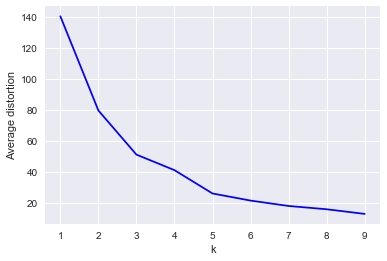

In [23]:
cluster = issues.drop('PROBLEM_TYPE',axis=1)

# Calculate optimal number of clusters with elbow methos
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cluster)
    prediction=model.predict(cluster)
    meanDistortions.append(sum(np.min(cdist(cluster, 
        model.cluster_centers_, 'euclidean'), 
        axis=1)) / cluster.shape[0])

# Create a plot
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')


In [24]:
k_cluster = KMeans(3)
k_cluster.fit(cluster)

predict = k_cluster.predict(cluster)

# Merge into original data
issues["GROUP"] = predict
print("Groups Assigned : \n")
issues[["GROUP","PROBLEM_TYPE"]]

Groups Assigned : 



,GROUP,PROBLEM_TYPE
0,0,Admin Password Lost
1,0,Windows Reboots automatically
2,0,System not coming up after reboot
3,2,Slow system
4,1,Internet Connectivity loss
5,0,New Installation hangs
6,0,Intermittent Blank Screen
7,2,Too many popups in Browser
8,2,Cannot find printer
9,0,Missing peripheral driver


## Evaluate clusters

{'boxes': [<matplotlib.lines.Line2D at 0x29b429a7be0>,
 'caps': [<matplotlib.lines.Line2D at 0x29b429b2f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x29b429c1f60>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x29b429c10b8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x29b429a7dd8>,
  <matplotlib.lines.Line2D at 0x29b428172e8>]}

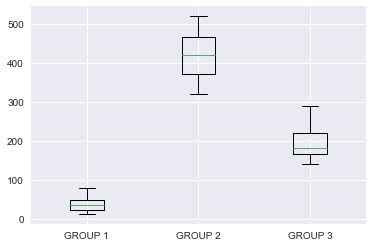

In [25]:

plt.cla()
plt.boxplot([[issues["COUNT"][issues.GROUP==0]],
              [issues["COUNT"][issues.GROUP==1]] ,
                [issues["COUNT"][issues.GROUP==2]] ],
            labels=('GROUP 1','GROUP 2','GROUP 3'))

{'boxes': [<matplotlib.lines.Line2D at 0x29b42a9ceb8>,
 'caps': [<matplotlib.lines.Line2D at 0x29b42aaf908>,
 'fliers': [<matplotlib.lines.Line2D at 0x29b42ab7be0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x29b42ab7390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x29b42aa7828>,
  <matplotlib.lines.Line2D at 0x29b42951f28>]}

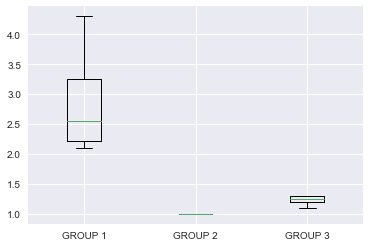

In [26]:
#Now for Avg. Calls to resolve
plt.cla()
plt.boxplot([[issues["AVG_CALLS_TO_RESOLVE"][issues.GROUP==0]],
              [issues["AVG_CALLS_TO_RESOLVE"][issues.GROUP==1]] ,
                [issues["AVG_CALLS_TO_RESOLVE"][issues.GROUP==2]] ],
            labels=('GROUP 1','GROUP 2','GROUP 3'))

{'boxes': [<matplotlib.lines.Line2D at 0x29b42b7f828>,
 'caps': [<matplotlib.lines.Line2D at 0x29b42b89be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x29b42b99ba8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x29b42b93cc0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x29b42b7fa20>,
  <matplotlib.lines.Line2D at 0x29b42b31c50>]}

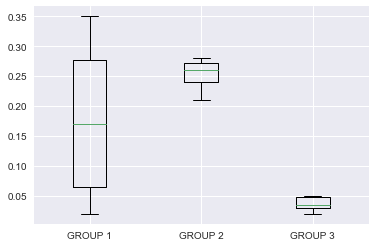

In [27]:
plt.cla()
plt.boxplot([[issues["REOCCUR_RATE"][issues.GROUP==0]],
              [issues["REOCCUR_RATE"][issues.GROUP==1]] ,
                [issues["REOCCUR_RATE"][issues.GROUP==2]] ],
            labels=('GROUP 1','GROUP 2','GROUP 3'))

{'boxes': [<matplotlib.lines.Line2D at 0x29b42c6cd68>,
 'caps': [<matplotlib.lines.Line2D at 0x29b42c7f7b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x29b42c86a90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x29b42c86240>,
 'whiskers': [<matplotlib.lines.Line2D at 0x29b42c6cf60>,
  <matplotlib.lines.Line2D at 0x29b42bfbe80>]}

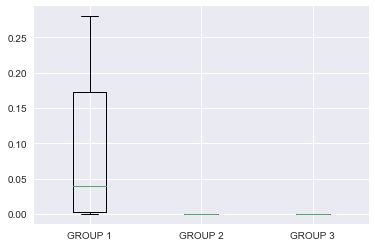

In [28]:
plt.cla()
plt.boxplot([[issues["REPLACEMENT_RATE"][issues.GROUP==0]],
              [issues["REPLACEMENT_RATE"][issues.GROUP==1]] ,
                [issues["REPLACEMENT_RATE"][issues.GROUP==2]] ],
            labels=('GROUP 1','GROUP 2','GROUP 3'))